In [49]:
import pandas as pd
import numpy as np

Importando o data frame

In [50]:
df_gdp=pd.read_csv('dados/GDP.csv',decimal='.')
df_gdp.head()

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


Como os dados das colunas estão formatados ?

In [51]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


 As colunas do data frame GDP_pp e Year estão no formato string, vamos formata-las para utilizar.

In [52]:
df_gdp['year2']=df_gdp['Year'].apply(lambda x:int(x.split('/')[-1]))
df_gdp['gdp2']=df_gdp[' GDP_pp '].apply(lambda x:float(x.split()[0].replace(',','')))


Qual foi o primeiro registro de cada país?

In [53]:
df_gdp.groupby('Country')['year2'].min()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: year2, Length: 193, dtype: int64

Quais foram as regiões com maior crescimento PIB per capita no século passado ?

In [54]:
df_gdp_start=df_gdp[df_gdp['year2']==1901]
df_gdp_end=df_gdp[df_gdp['year2']==1996]
((df_gdp_end.groupby('Region')['gdp2'].mean()/df_gdp_start.groupby('Region')['gdp2'].mean()-1)*100).sort_values()


Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: gdp2, dtype: float64

vamos preencher os anos ausentes em cada pais com uma estimativa,baseada na diferença entre 
próximo registro e o anterior.

In [55]:
arr_year=np.arange(df_gdp['year2'].min(),df_gdp['year2'].max())  # criando um array com todos anos
arr_year

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [56]:
df_all_years=pd.DataFrame(arr_year,columns=['Year'])
df_all_years

,Year
0,1901
1,1902
2,1903
3,1904
4,1905
...,...
105,2006
106,2007
107,2008
108,2009


In [57]:
df_all_years.index=df_all_years['Year'] #obtendo ano a ano
df_years_off=~df_all_years['Year'].isin(df_gdp['year2'])
df_years_off=df_all_years.loc[df_years_off].index
df_years_off

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [58]:
df_gdp.sort_values(['Country','year2'])
df_gdp['delta_gdp']=df_gdp['gdp2']-df_gdp['gdp2'].shift(1)
df_gdp['delta_year']=df_gdp['year2']-df_gdp['year2'].shift(1)
df_gdp['gdp_year']=(df_gdp['delta_gdp']/df_gdp['delta_year']).shift(-1)  #taxa ano a ano
df_gdp['next_year']=df_gdp['year2'].shift(-1)
df_gdp.head()

,Country,Region,Year,GDP_pp,year2,gdp2,delta_gdp,delta_year,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1901,613.99,NaN,NaN,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04,1906,624.04,10.05,5.0,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25,1911,634.25,10.21,5.0,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28,1916,647.28,13.03,5.0,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40,1921,662.40,15.12,5.0,3.094,1926.0


In [59]:
#del df_gdp['delta_gdp'],df_gdp['delta_year']

df_new_data=pd.DataFrame()

for idx,row in df_gdp.iterrows():
    if row['year2']==2011:
        continue
    
    years_to_add=df_years_off[(df_years_off < row['next_year'])& (df_years_off>row['year2'])]
    
    for new_year in years_to_add:
        add_row=row.copy()
        add_row['gdp2']=(new_year-add_row['year2'])*add_row['gdp_year']+add_row['gdp2']
        add_row['year2']=new_year
        add_row['kind']='estimativa'
        df_new_data=pd.concat([df_new_data,add_row.to_frame().transpose()])


In [60]:
df_new_data

,Country,Region,Year,GDP_pp,year2,gdp2,delta_gdp,delta_year,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1902,616,NaN,NaN,2.01,1906,estimativa
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1903,618.01,NaN,NaN,2.01,1906,estimativa
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1904,620.02,NaN,NaN,2.01,1906,estimativa
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1905,622.03,NaN,NaN,2.01,1906,estimativa
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04,1907,626.082,10.05,5,2.042,1911,estimativa
...,...,...,...,...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96,2005,560.128,-61.54,5,-39.958,2006,estimativa
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17,2007,521.402,-199.79,5,1.232,2011,estimativa
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17,2008,522.634,-199.79,5,1.232,2011,estimativa
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17,2009,523.866,-199.79,5,1.232,2011,estimativa


In [61]:
df_gdp=pd.concat([df_gdp,df_new_data])

In [62]:
df_gdp.sort_values(['Country','year2'],inplace=True)
df_gdp.index=df_gdp['year2']
df_gdp['kind'].fillna('real',inplace=True)

In [63]:
df_gdp

,Country,Region,Year,GDP_pp,year2,gdp2,delta_gdp,delta_year,gdp_year,next_year,kind
year2,,,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1901,613.99,NaN,NaN,2.01,1906,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1902,616,NaN,NaN,2.01,1906,estimativa
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1903,618.01,NaN,NaN,2.01,1906,estimativa
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1904,620.02,NaN,NaN,2.01,1906,estimativa
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99,1905,622.03,NaN,NaN,2.01,1906,estimativa
...,...,...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17,2007,521.402,-199.79,5,1.232,2011,estimativa
2008,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17,2008,522.634,-199.79,5,1.232,2011,estimativa
2009,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17,2009,523.866,-199.79,5,1.232,2011,estimativa


Criando um gráfico para visualizar as estimativas

<AxesSubplot:xlabel='year2', ylabel='gdp2'>

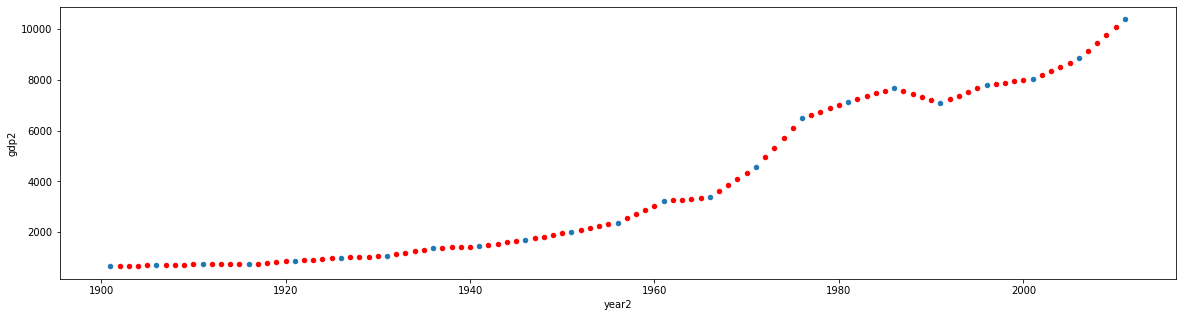

In [67]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(20,5)) #definindo axes

country='Brazil'  #definindo uma variável
df_gdp[(df_gdp['kind']=='real') &(df_gdp['Country']==country)].plot(kind='scatter',y='gdp2',x='year2',ax=ax)
df_gdp[(df_gdp['kind']=='estimativa') &(df_gdp['Country']==country)].plot(kind='scatter',y='gdp2',x='year2',ax=ax,color='red')
